# Python Seaborn 

## What is Seaborn?

- Python Data Visualization Library - based on MatPlotLib 
- Used for plotting statistical graphs, identifying trends, relationships & outliers

##  Overview of Seaborn Visualization for Stocks Analysis

1. Line Plot
2. Bar Plot
3. Box Plot
4. Subplots
5. Scatter Plots
6. HIstograms
7. Jointplots
8. Pairplots
9. lmplots
10. Heatmap

## Stocks Analysis:  
1. Change in 'AAPL' price and Volume over time.
2. Daily return of SPY (S&P 500 ETF)
3. AAPL price change during financial crisis of 2007-2008 and during COVID.
4. Moving average of the various stocks
5. Correlation between different stocks' daily returns
6. Correlation between different stocks' closing price

For the purpose of Stocks Analysis, we will first create a dataframe from yahoo finance.

## Importing / Installing packages



In [138]:
# Packages / libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from pandas import Series
from datetime import datetime
%matplotlib inline

## 1. Loading the Raw Data
Data Preparation and Cleaning


In [139]:
# runs all the data for AAPL
aapl = web.get_data_yahoo('AAPL', 2000, 2021)

#runs the first 5 rows
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.860883
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.788302
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.799837
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.730621
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.765229


In [5]:
aapl['open_close_diff']=aapl['Open'] - aapl['Close']

In [137]:
aapl['Volatility'] = aapl['High'] - aapl['Low']

In [140]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.520477
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.492020


## Analysis and Visualization in Seaborn
##  1. Line Graph

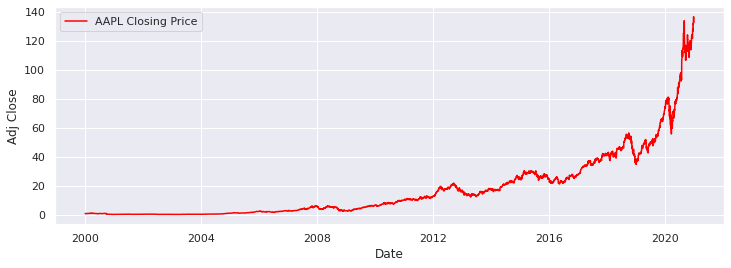

In [143]:
# Example 1 - Simple 1 line graph
# To investigate the Daily Stock Closing prices by Date
sns.set(rc={'figure.figsize':(12,4)})
ax = sns.lineplot(x='Date',y='Adj Close', data = aapl, label='AAPL Closing Price', color='red')

 This above graph gives an insight of how closing price of AAPL has increased over the years from 2017 to 2021

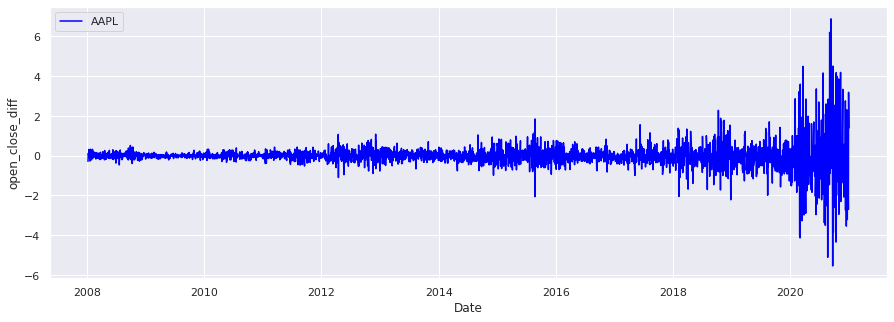

In [37]:
# Example 2 - Simple line graph
# Total stock traded each day 

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.lineplot(x='Date', y='open_close_diff', data = aapl[2015:],label='AAPL', color='Blue', legend=True)


In [28]:
# Data Acquisition
end = datetime.now()
start = datetime(end.year-3, end.month, end.day)

stocks = ['TSLA','MSFT','NFLX','GOOG','SPY','UAL','BAC','AAPL','QQQ']

for stock in stocks:
    globals() [stock] = web.get_data_yahoo(stock, start,end)

In [39]:
SPY['open_close_diff']=SPY['Open'] - SPY['Close']
MSFT['open_close_diff']=MSFT['Open'] - MSFT['Close']
GOOG['open_close_diff']=GOOG['Open'] - GOOG['Close']
UAL['open_close_diff']=UAL['Open'] - UAL['Close']
TSLA['open_close_diff']=TSLA['Open'] - TSLA['Close']

SPY['Volatility']=SPY['High'] - SPY['Low']
MSFT['Volatility']=MSFT['High'] - MSFT['Low']
GOOG['Volatility']=GOOG['High'] - GOOG['Low']
UAL['Volatility']=UAL['High'] - UAL['Low']
TSLA['Volatility']=TSLA['High'] - TSLA['Low']

SPY['Daily Return'] = SPY['Close'].pct_change()

<AxesSubplot:xlabel='Date', ylabel='Volatility'>

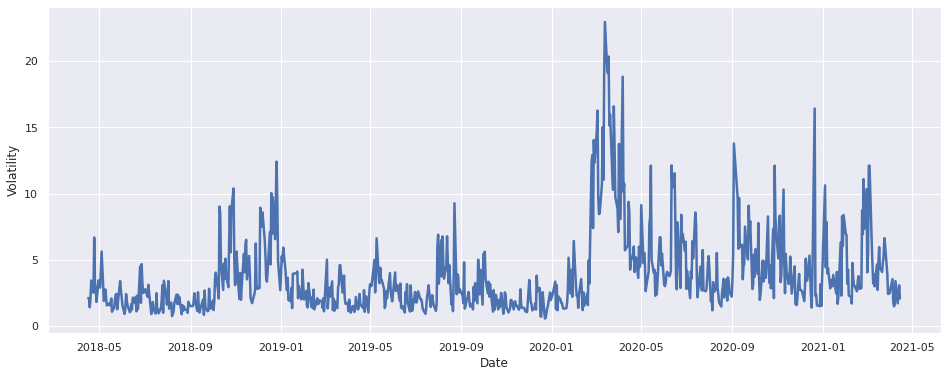

In [41]:
# Plot the Graph 
# Example 3 - Simple line graph - investigating the Volatility of SPY
sns.set(rc={'figure.figsize':(16,6)})
sns.lineplot(data=SPY['Volatility'], linewidth=2.5)



#High volatility means that the price of a security can change dramatically over a short 
time period in either direction. A lower volatility means that a security's value does 
not fluctuate dramatically, but changes in value at a steady pace over a period of time. Having said this, buying stocks that are highly volatile can be counterproductive if the drop/rise is too steep. While there is no rule, most intraday traders prefer stocks that tend to move between 3-5% either side.

<AxesSubplot:xlabel='Date', ylabel='open_close_diff'>

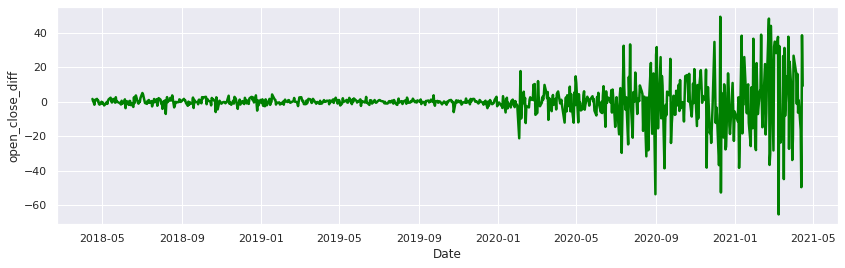

In [43]:
# Plot the Graph 
# Example 4 - Simple line graph- Open-Close Difference of TESLA
sns.lineplot(data=TSLA['open_close_diff'], linewidth=2.5, color='green')


The distribution of daily difference in stock prices that is the difference in opening
and closing prices, can be seen in the graph. As we can see majority of the differences are around 0, hence mostly the there is not much difference between the daily opening and closing price. We can also see that the frequency of the difference being positive is more, this tell us that the frequency of rise in price at the closing is less than the frequency of opening price being higher than the closing price.

In [9]:
TSLA.idxmax()

High              2021-01-25
Low               2021-01-26
Open              2021-01-26
Close             2021-01-26
Volume            2020-02-04
Adj Close         2021-01-26
open_close_diff   2020-12-09
Volatility        2021-02-23
dtype: datetime64[ns]

<AxesSubplot:xlabel='Date'>

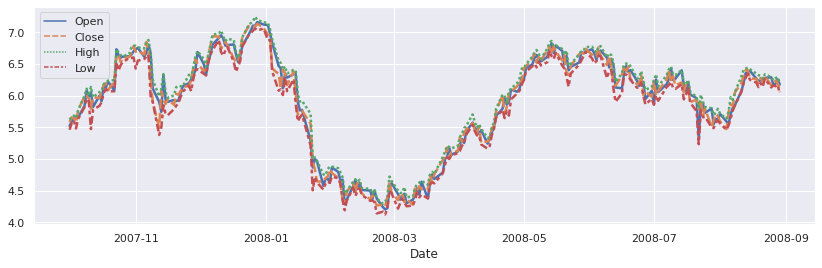

In [47]:
# Example 5: Line Graph
sns.set(rc={'figure.figsize':(14,4)})
aapl_price = aapl[['Open','Close','High', 'Low']]
aapl_price_six_month=aapl_price['2007-10-01':'2008-09-01']
sns.lineplot(data=aapl_price_six_month, linewidth=2.5, color="red")

<AxesSubplot:xlabel='Date'>

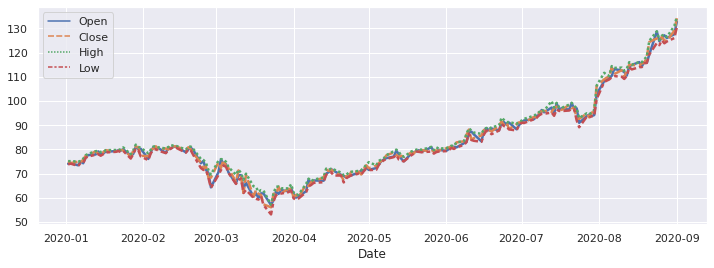

In [144]:
# Example 6: Line Graph during pandemic-2020
aapl_price_pandemic=aapl_price['2020-01-01':'2020-09-01']
sns.lineplot(data=aapl_price_pandemic, linewidth=2.5)

This graph shows during March 2020 (during pandemic), AAPL stock's lowest was 55.

And within 6 months, it's highest was 138 ( On Sept). Soon after that, correction happened, aapl stock reached toward 105. And then again on January 2021, It reached it's high at 138

In [124]:
# Data acquisition to plot TSLA Volatility by month.
TSLA['Date']= pd.to_datetime(TSLA.index)
TSLA['Year']= pd.DatetimeIndex(TSLA.Date).year
TSLA['Month']= pd.DatetimeIndex(TSLA.Date).month
TSLA['Weekday']= pd.DatetimeIndex(TSLA.Date).weekday

In [125]:
TSLA

,High,Low,Open,Close,Volume,Adj Close,open_close_diff,Volatility,Date,Year,Month,Weekday,Daily Return
Date,,,,,,,,,,,,,
2018-04-16,59.931999,57.801998,59.799999,58.242001,31692500.0,58.242001,1.557999,2.130001,2018-04-16,2018,4,0,NaN
2018-04-17,58.433998,56.501999,57.773998,57.537998,35000000.0,57.537998,0.236000,1.931999,2018-04-17,2018,4,1,-0.012088
2018-04-18,60.048000,57.632000,58.216000,58.669998,32788500.0,58.669998,-0.453999,2.416000,2018-04-18,2018,4,2,0.019674
2018-04-19,60.202000,57.709999,58.216000,60.015999,30453000.0,60.015999,-1.799999,2.492001,2018-04-19,2018,4,3,0.022942
2018-04-20,59.995998,57.950001,59.034000,58.048000,28139500.0,58.048000,0.986000,2.045998,2018-04-20,2018,4,4,-0.032791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-09,680.969971,669.429993,677.770020,677.020020,21402600.0,677.020020,0.750000,11.539978,2021-04-09,2021,4,4,-0.009915
2021-04-12,704.799988,682.090027,685.700012,701.979980,29135700.0,701.979980,-16.279968,22.709961,2021-04-12,2021,4,0,0.036867
2021-04-13,763.000000,710.659973,712.700012,762.320007,44652800.0,762.320007,-49.619995,52.340027,2021-04-13,2021,4,1,0.085957


# 2. Bar Plot

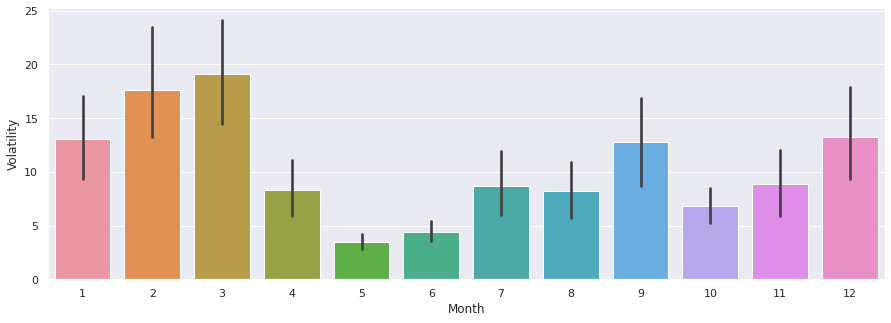

In [70]:
#Example 1: Tesla Volatility by Month
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data=TSLA, y="Volatility", x="Month")
#Notes:
# the lines signify confidence interval
#takes mean by default

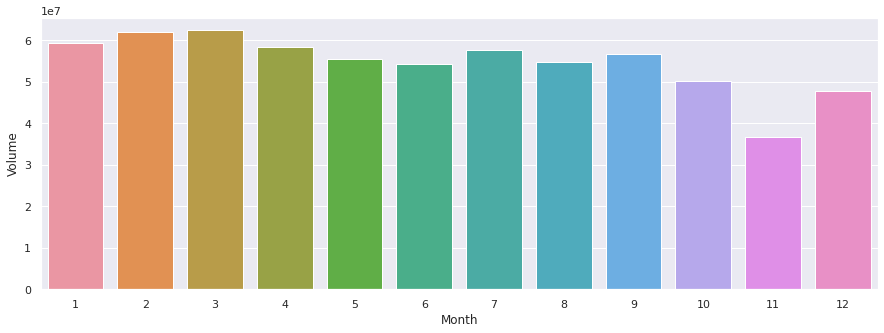

In [71]:
#Example 2: Tesla Volume by Month, remove confidence interval
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data=TSLA, y="Volume", x="Month",ci=None)

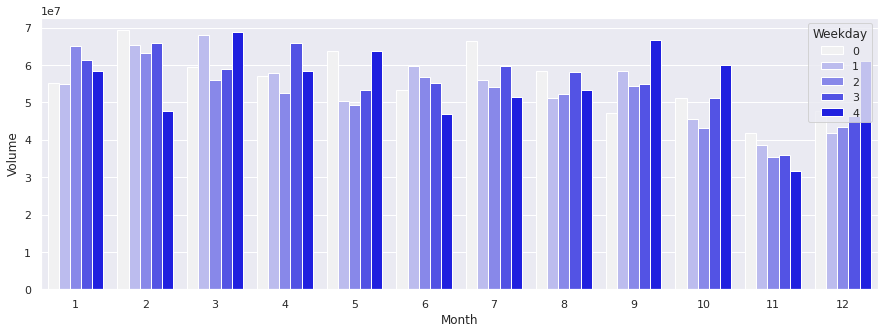

In [145]:
#Example 3: Tesla Volume by Month, remove confidence interval, change color and add hue
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data=TSLA, y="Volume", x="Month",hue="Weekday",ci=None,color="BLUE")

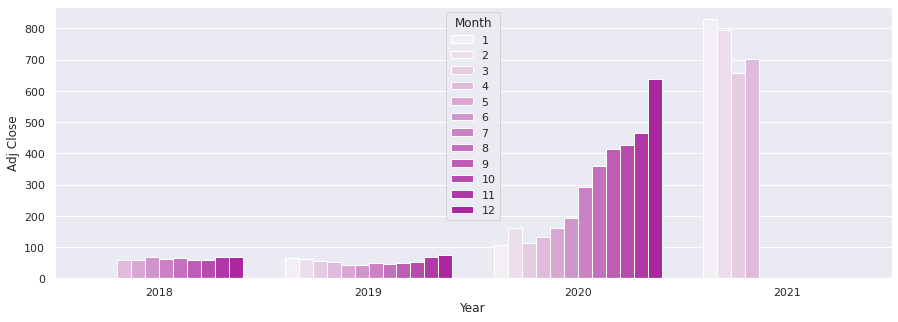

In [73]:
#Example 5: Tesla High by Year, remove confidence interval, change color and add hue
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data=TSLA, y="Adj Close", x="Year",hue="Month",ci=None,color="#C011B2")

# Cool way to pick colors
# https://htmlcolorcodes.com/color-picker/

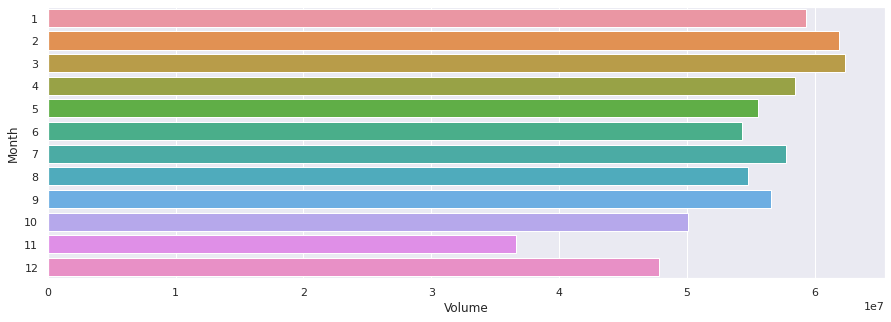

In [74]:
#Example 6: Tesla Volume by Month, remove confidence interval
#Changing Direction
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data=TSLA, x="Volume", y="Month",ci=None, orient='h')

# 3. Box Plot

1.7999992370605469


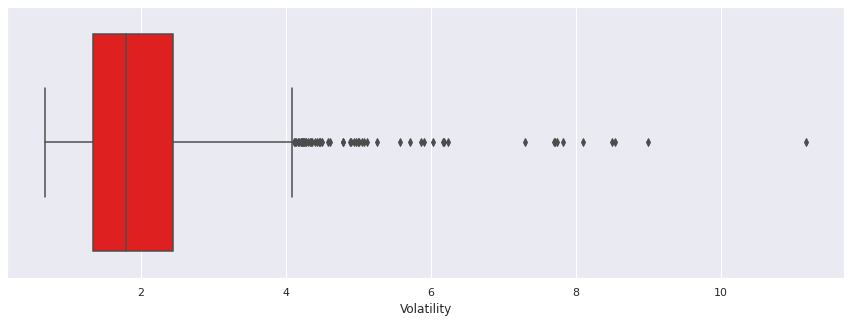

In [146]:
# Example1: Investigating the Distribution of UAL Volatility
ax = sns.boxplot(x=UAL["Volatility"], color="red")

print(UAL["Volatility"].median())
#Notes:
 #   - The Line signifies the Median
# The box in the middle shows the beginning of Q1 (25th percentile) to the end of Q3 (75 percentile)
# The whiskers shows the minimum and maximum quartile. 
# The dots on the right are outliers

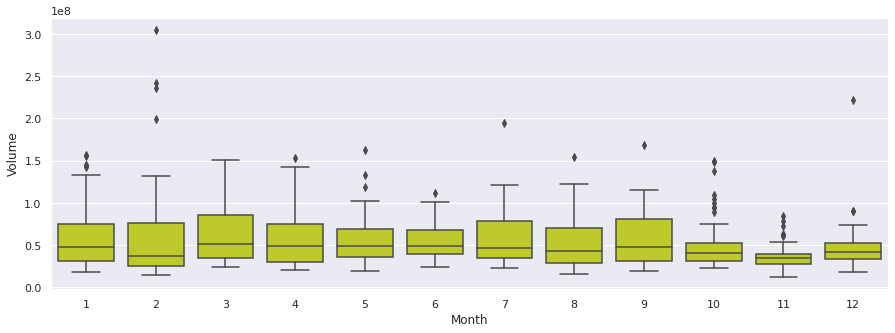

In [76]:
#Example 2: Investigating the Distribution of Volume by Month

ax = sns.boxplot(y=TSLA["Volume"],x=TSLA["Month"], data = TSLA, color='#D5E410')

# Median highest Day, Lowest Day
# Outliers

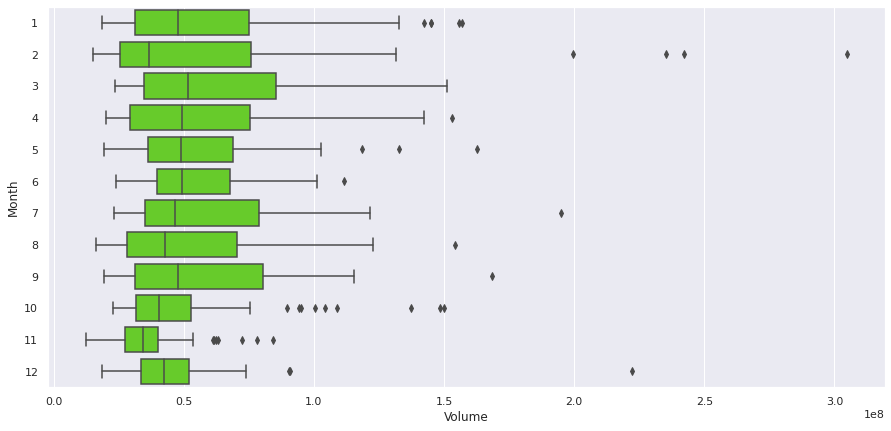

In [77]:
#Example 3: Investigating the Distribution of Volume by Month, Change orientation
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.boxplot(x=TSLA["Volume"],y=TSLA["Month"], data = TSLA, color='#61E610',orient="h")

# Median highest Day, Lowest Day
# Outliers

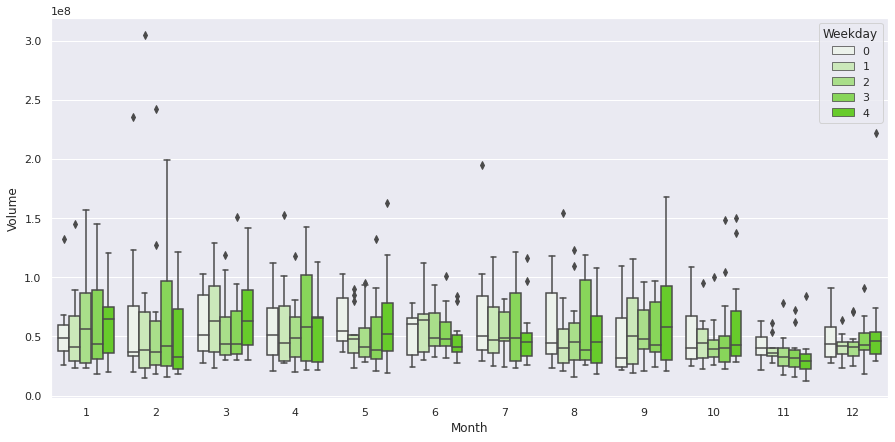

In [79]:
#Example 4: Investigating the Distribution of Volume by Month, adding hue
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.boxplot(y=TSLA["Volume"],x=TSLA["Month"], data = TSLA, color='#61E610',hue="Weekday")

# Median highest Day, Lowest Day
# Outliers

/home/suchita/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/suchita/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/suchita/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/suchita/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


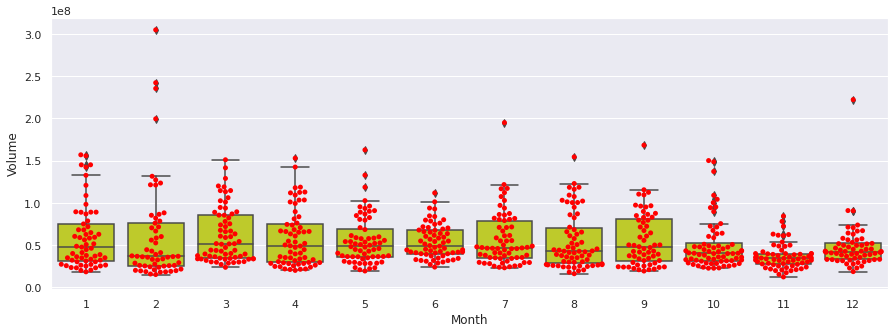

In [147]:
#Example 5: Investigating the Distribution of Volume by Month, by data points (Swarm plot)

ax = sns.boxplot(y=TSLA["Volume"],x=TSLA['Month'], data = TSLA, color='#D5E410')
ax = sns.swarmplot(y=TSLA["Volume"],x=TSLA['Month'], data = TSLA, color='red')
 
# where data is concentrated


## 4. SubPlots

/home/suchita/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

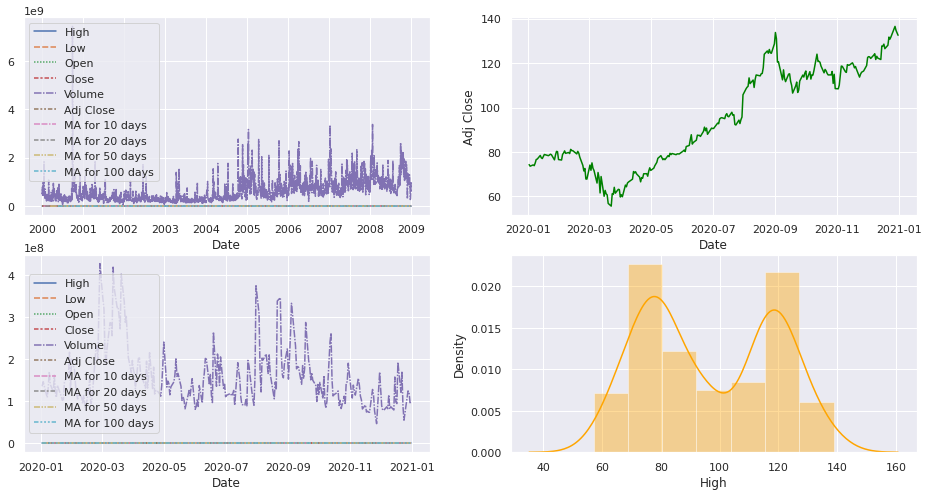

In [120]:
# set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# fig.tight_layout(pad=3.0)

#plot 1

ap=aapl['2000-01-01':'2008-12-31']
sns.lineplot(data=ap,color='red',ax=axes[0,0])

#plot 2
b=aapl['2020-01-01':]['Adj Close']
sns.lineplot(data=b,color="green", ax= axes[0,1])

#plot 3
c=aapl['2020-01-01':]
sns.lineplot(data=c,color='Red', ax= axes[1,0])

#plot 4
d=aapl['2020-01-01':]['High']
sns.distplot(d,color='Orange', ax= axes[1,1])

## 5. Scatter Plots

<AxesSubplot:xlabel='Date', ylabel='Volume'>

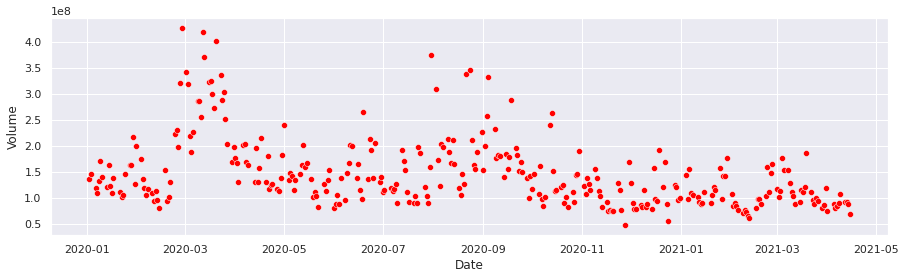

In [82]:
# Example 1 (Relationship between Volume & Date)
sns.set(rc={'figure.figsize':(15,4)})
sns.scatterplot(data=AAPL['2020-01-01':].Volume, color="red")

32788500.0


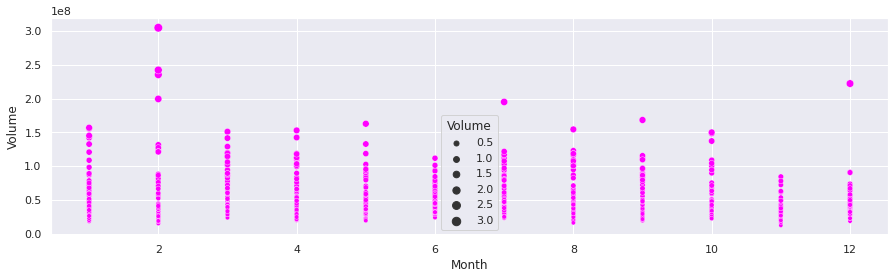

In [87]:
# Example 2 (Relationship between Volume & Date), Add size
sns.set(rc={'figure.figsize':(15,4)})
sns.scatterplot(data=TSLA,y="Volume", x="Month", color="magenta", size="Volume")

print(TSLA['Volume'][2])
#Inference: Best performing Month: Feb & Sep

 Crisis always have effect on stock market, as people try to time the stock market, and hence, it's evident that 
volume of stocks always increase. In the above chart, it's very much clear when the huge volume was traded.

In [149]:
 #Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]
    
for ma in MA_day:
    column_name = "MA for %s days" %(str(ma))
    aapl[column_name] = Series.rolling(aapl['Adj Close'],ma).mean()

<AxesSubplot:xlabel='Date'>

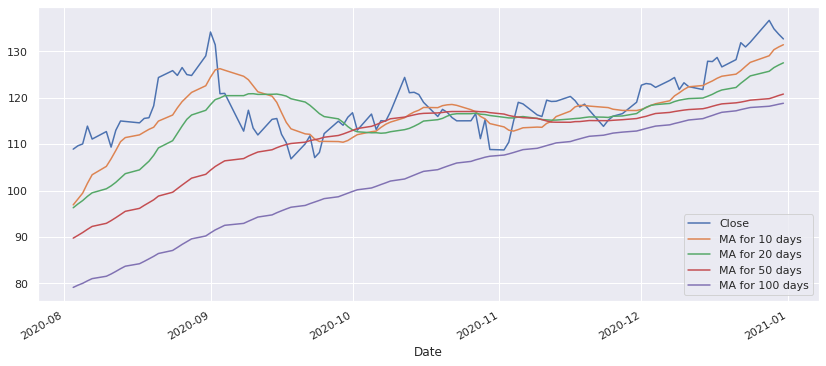

In [150]:
aapl_ma=aapl['2020-08-01':'2021-01-01']
aapl_ma[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(14,6))

## 6. Histograms

In [90]:
# We'll use pct_change to find the percent change for each day
TSLA['Daily Return'] = TSLA['Close'].pct_change()

# # Lets plot the daily return percentage

<AxesSubplot:ylabel='Count'>

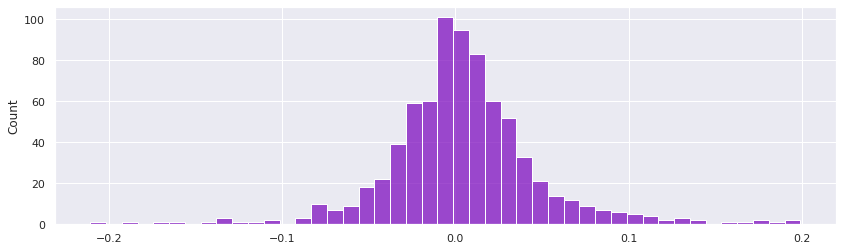

In [91]:
#Example 1 With histograms
sns.set(rc={'figure.figsize':(14,4)})
x=TSLA['Daily Return'].values
sns.histplot(x,color="#8011C0")

<AxesSubplot:xlabel='open_close_diff', ylabel='Count'>

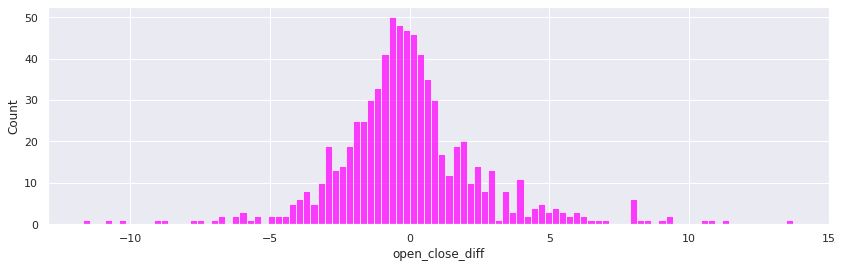

In [92]:
#Example 2: Open Close Difference of SPY
sns.histplot(SPY['open_close_diff'].dropna(), bins=100, color='magenta')


-0.032724774073040676


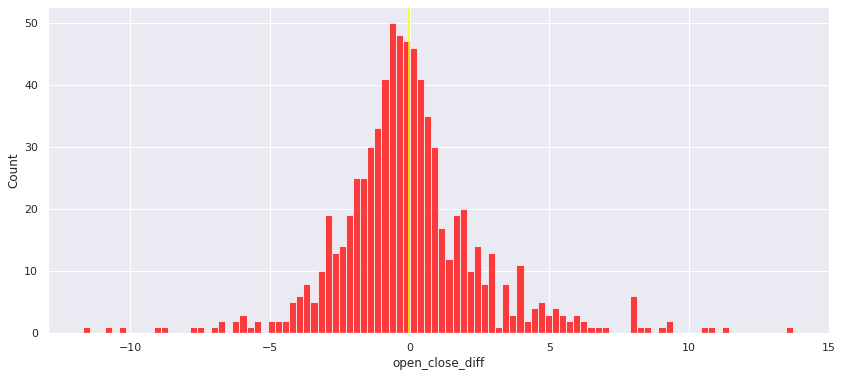

In [104]:
#Example 3: # Distribution of Open Close Difference by Mean
mean=SPY['open_close_diff'].mean()
print(mean)

sns.histplot(SPY['open_close_diff'].dropna(), bins=100, color='red')

plt.axvline(mean,0,1,color='Yellow')

Now we want to analyze all the stocks 

In [131]:
stocks = ['TSLA', 'MSFT', 'FB', 'SPY','QQQ', 'UAL', 'BAC','AAPL']

closingprice_df = web.DataReader(stocks, 'yahoo', start, end)['Close']

In [94]:
closingprice_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2018-04-16 to 2021-04-15
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    756 non-null    float64
 1   MSFT    756 non-null    float64
 2   FB      756 non-null    float64
 3   SPY     756 non-null    float64
 4   QQQ     756 non-null    float64
 5   UAL     756 non-null    float64
 6   BAC     756 non-null    float64
 7   AAPL    756 non-null    float64
dtypes: float64(8)
memory usage: 53.2 KB


In [132]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [133]:
tech_returns.head(10)

Symbols,TSLA,MSFT,FB,SPY,QQQ,UAL,BAC,AAPL
Date,,,,,,,,
2018-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-17,-0.012088,0.020176,0.023236,0.010698,0.021525,0.000446,0.003675,0.013764
2018-04-18,0.019674,0.003851,-0.013637,0.000740,0.002047,0.048114,-0.016977,-0.002244
2018-04-19,0.022942,-0.003422,0.010459,-0.005548,-0.009192,-0.004959,0.022012,-0.028340
2018-04-20,-0.032791,-0.011549,-0.010827,-0.008479,-0.015827,0.021643,0.002651,-0.040972
2018-04-23,-0.023670,0.003684,-0.002646,-0.000150,-0.002526,-0.019791,0.001983,-0.002896
2018-04-24,0.000318,-0.023387,-0.037084,-0.013467,-0.021187,-0.019622,-0.004288,-0.013919
2018-04-25,-0.009772,-0.008699,0.000000,0.002472,0.001199,-0.006381,-0.001656,0.004357
2018-04-26,0.017065,0.021125,0.090613,0.010166,0.021053,-0.027587,-0.002322,0.003483


Now we can compare the daily percentage return of two stocks to check how correlated. 
First let's see a stock compared to itself.


## 7. JointPlots
#### Draw a plot of two variables with bivariate and univariate graphs.

For this, we will use Jointplot can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

jointplot() plots the relationship or joint distribution of two variables while adding marginal axes that show 
the univariate distribution of each one separately:

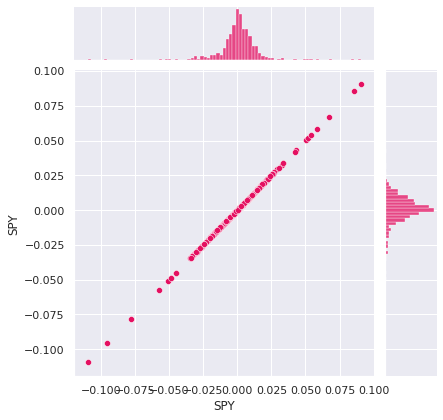

In [88]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='SPY',y='SPY',data=tech_returns,kind='scatter',color='#E41061')

So now, if two stocks are correlated, it will yield a perfect linear relationship. Let's compare BAC & SPY

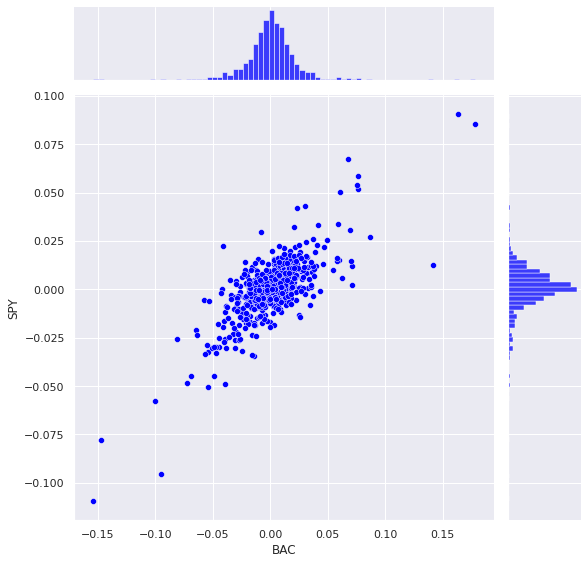

In [89]:
# We'll use jointplot to compare the daily returns of Google and Microsoft.

sns.jointplot(x='BAC',y='SPY',data=tech_returns, kind='scatter',height=8, color='blue')

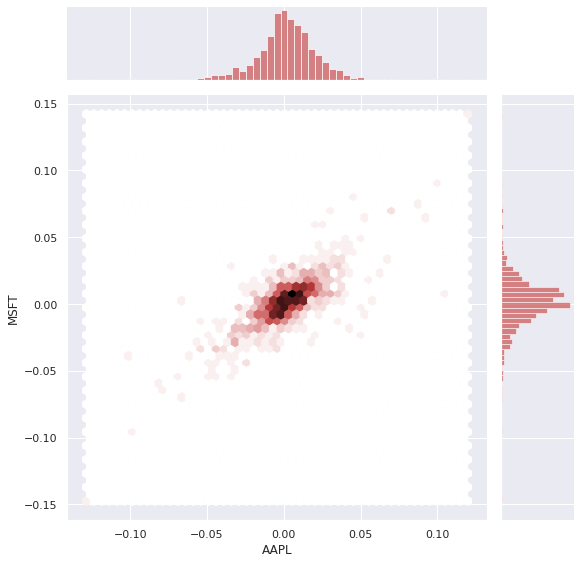

In [134]:
# with Hex plot
sns.jointplot(x='AAPL',y='MSFT',data=tech_returns, kind='hex',height=8, color='indianred')

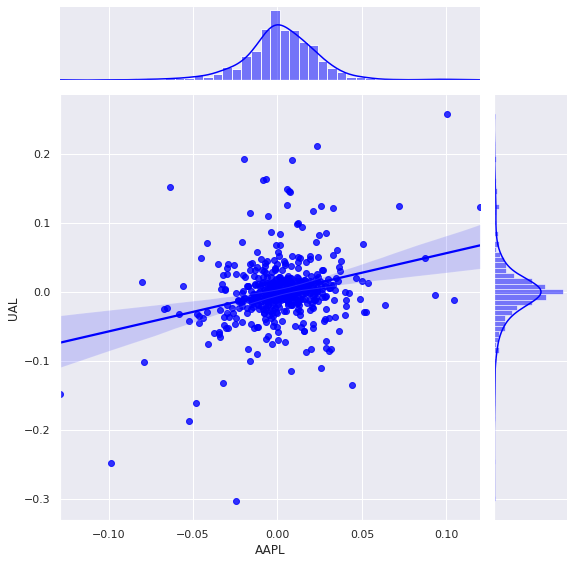

In [89]:
# Lets check out for Apple and United Airlines with reg jointplot
sns.jointplot(x='AAPL',y='UAL',data=tech_returns, kind='reg', height=8, color='blue')

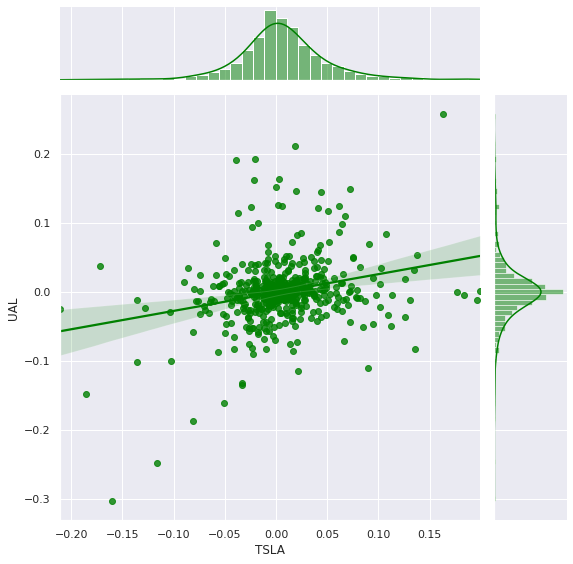

In [92]:
# Lets check out for Apple and United Airlines with reg jointplot
sns.jointplot(x='TSLA',y='UAL',data=tech_returns, kind='reg', height=8, color='green')

## 8. Pairplots

pairplot() is similar — it combines joint and marginal views — but rather than focusing on a single relationship, 
it visualizes every pairwise combination of variables simultaneously:

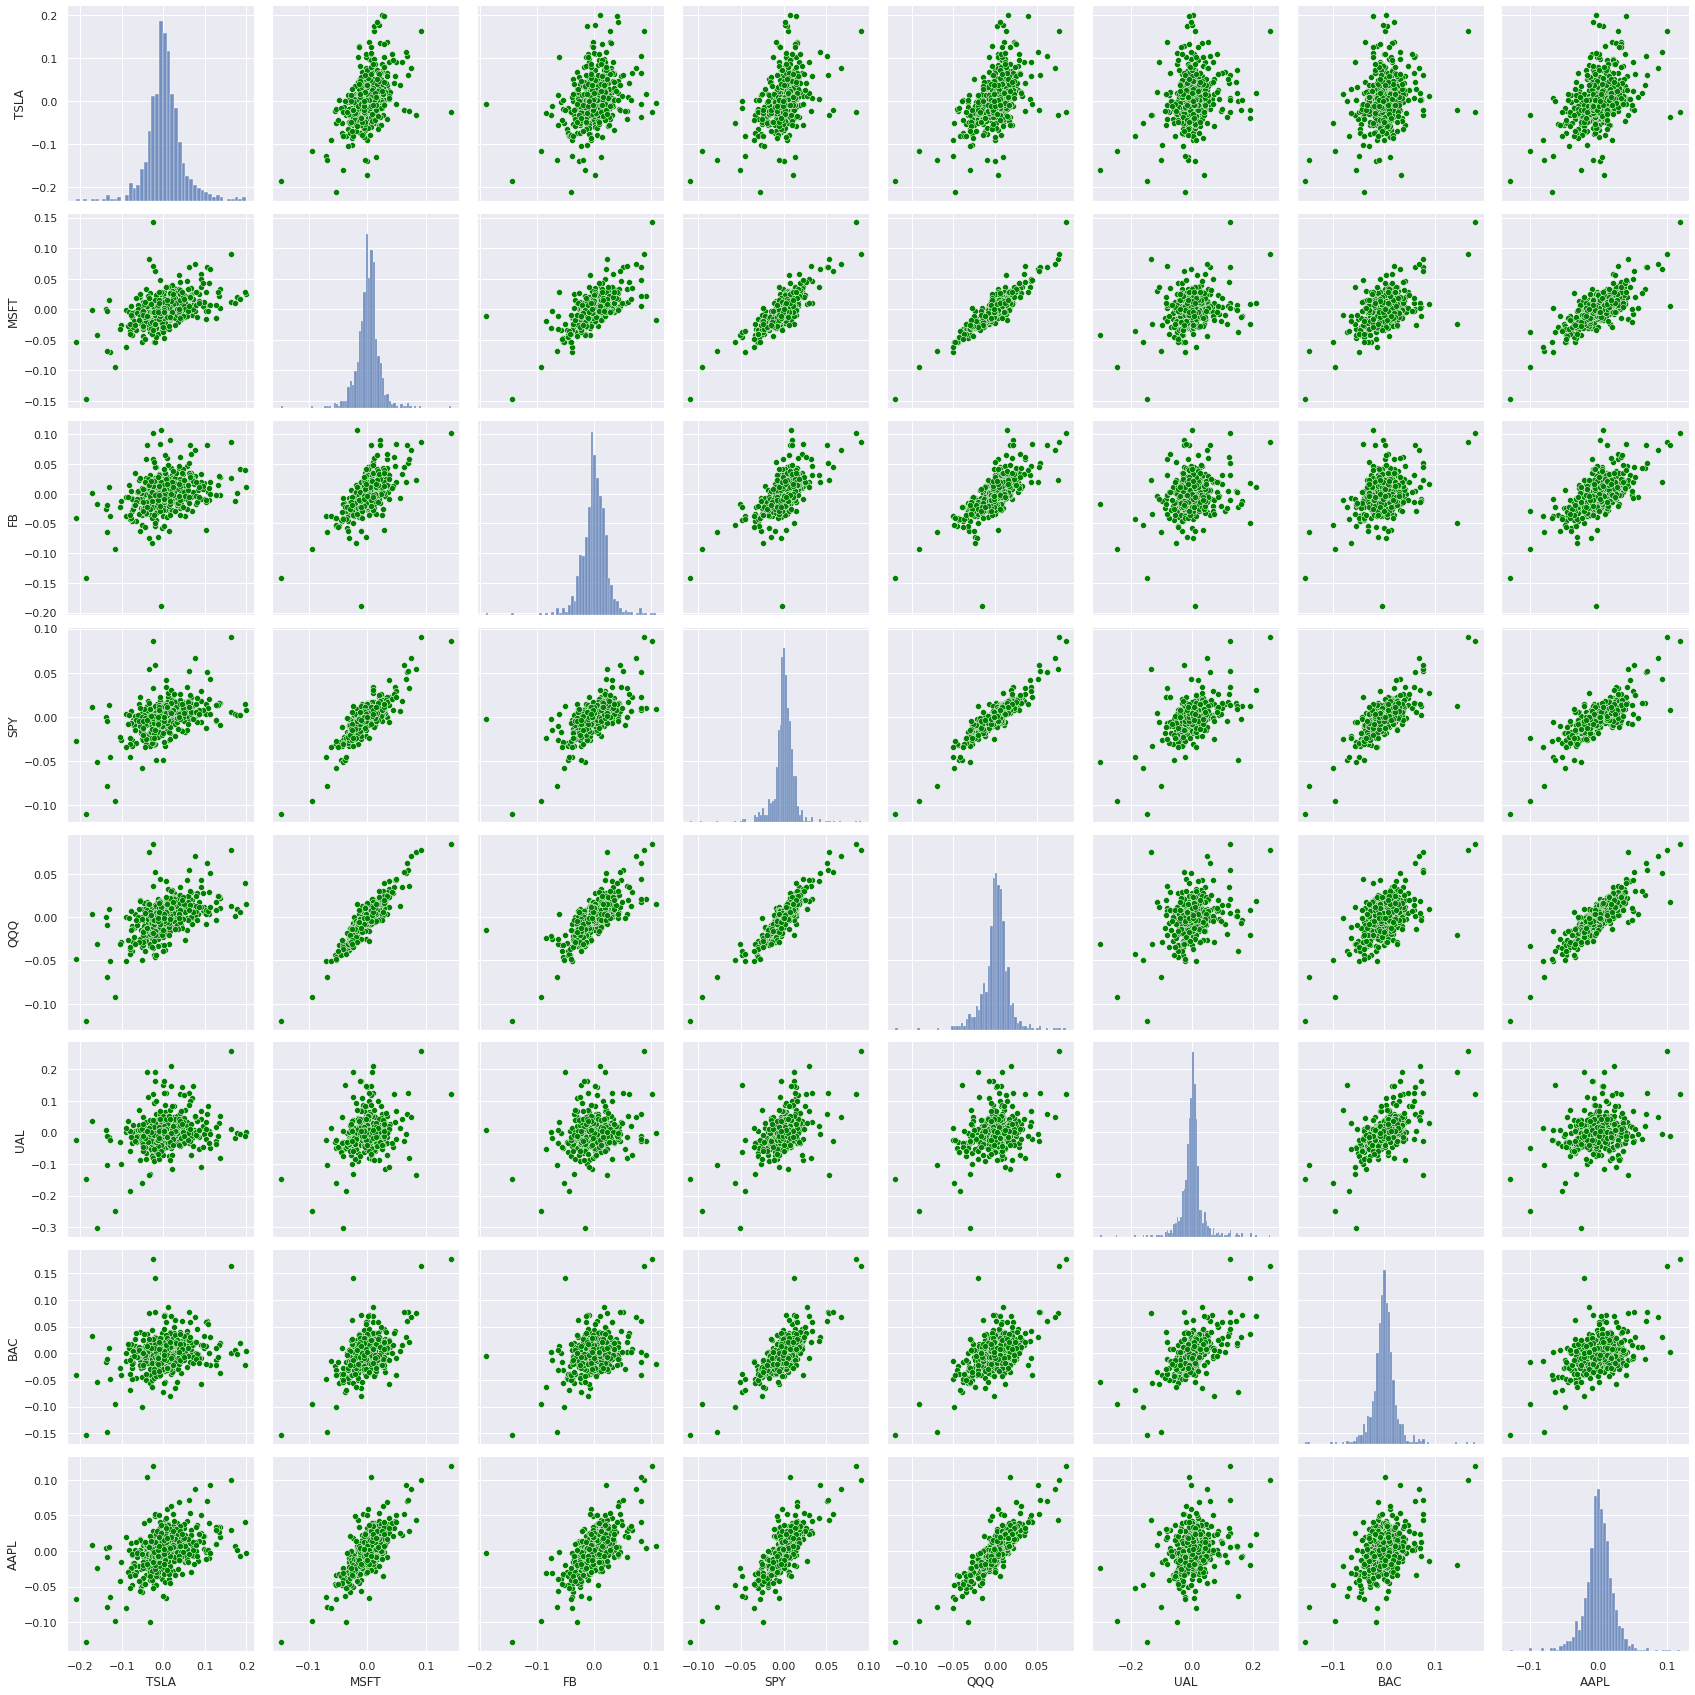

In [135]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_returns.dropna(),height=3, plot_kws={'color':'green'})

#It creates a scatter plot and dist plot in middle

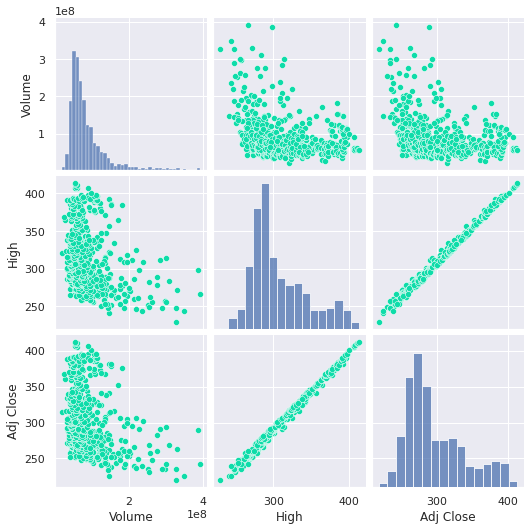

In [97]:
# Example 2 - running on specific columns - green color
g = sns.pairplot(SPY[['Volume','High','Adj Close']], plot_kws={'color':'#0EDCA9'})

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

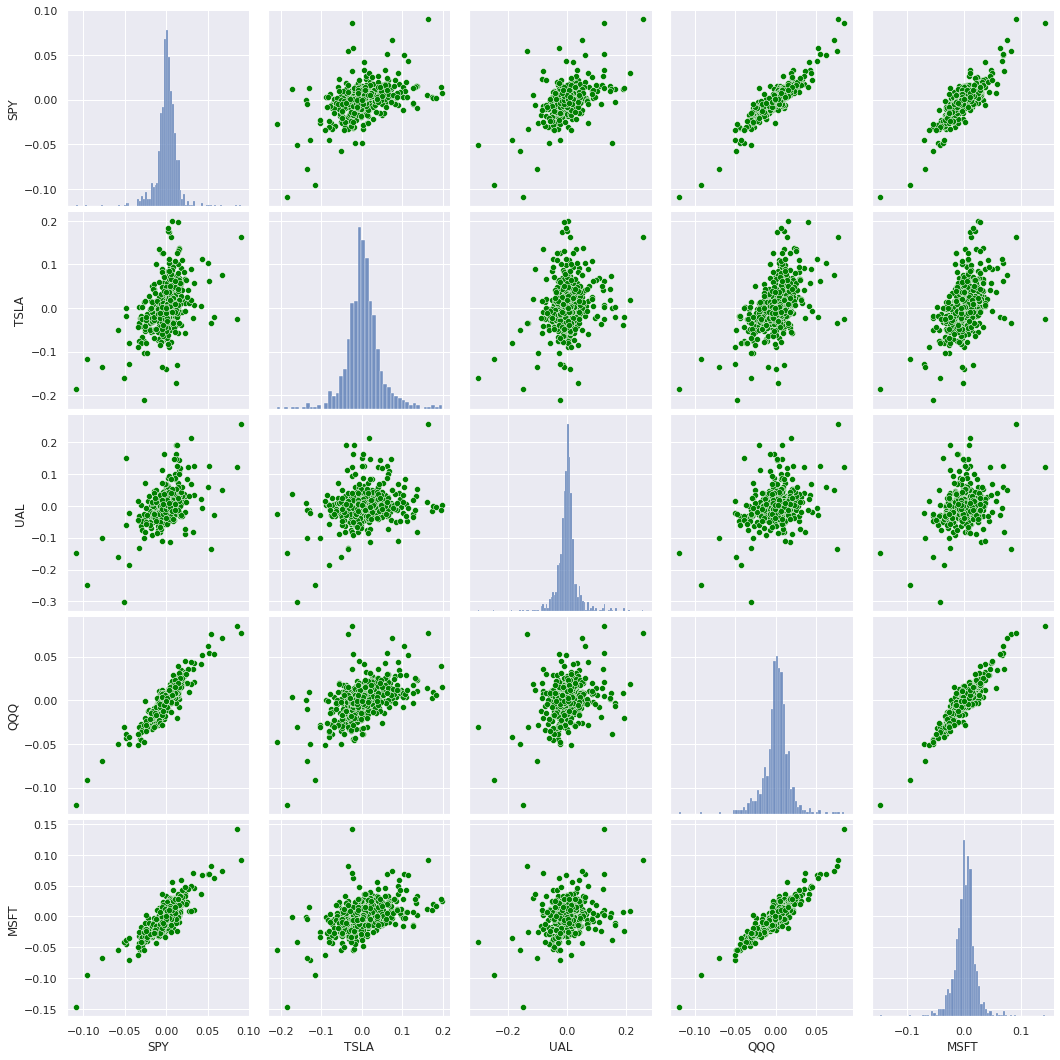

In [98]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_returns[['SPY','TSLA','UAL','QQQ','MSFT']],height=3, plot_kws={'color':'green'})

#It creates a scatter plot and dist plot in middle
#A straight line indicates linear relationship/

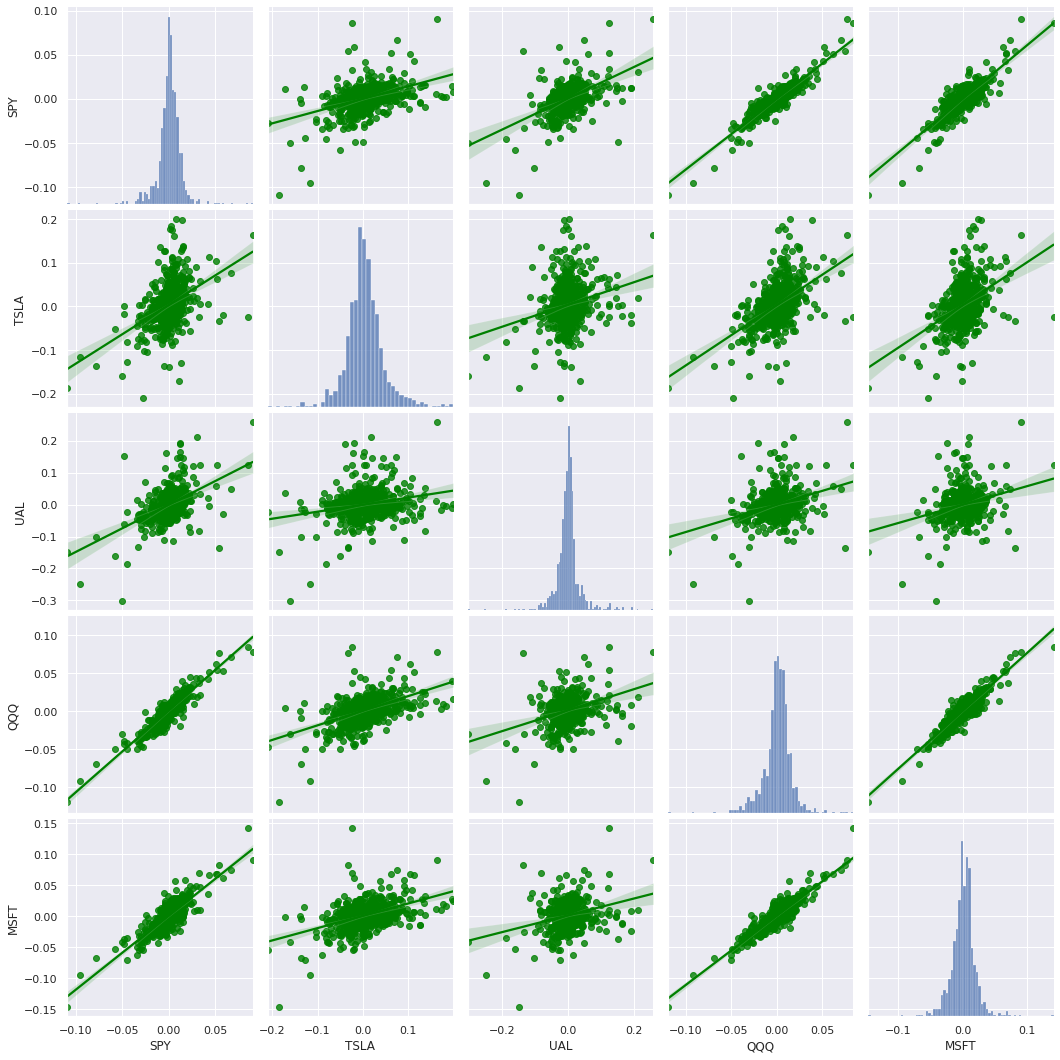

In [104]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons, adding kind-reg

sns.pairplot(tech_returns[['SPY','TSLA','UAL','QQQ','MSFT']],height=3, plot_kws={'color':'green'},kind='reg')

#It creates a scatter plot and dist plot in middle
#A straight line indicates linear relationship/

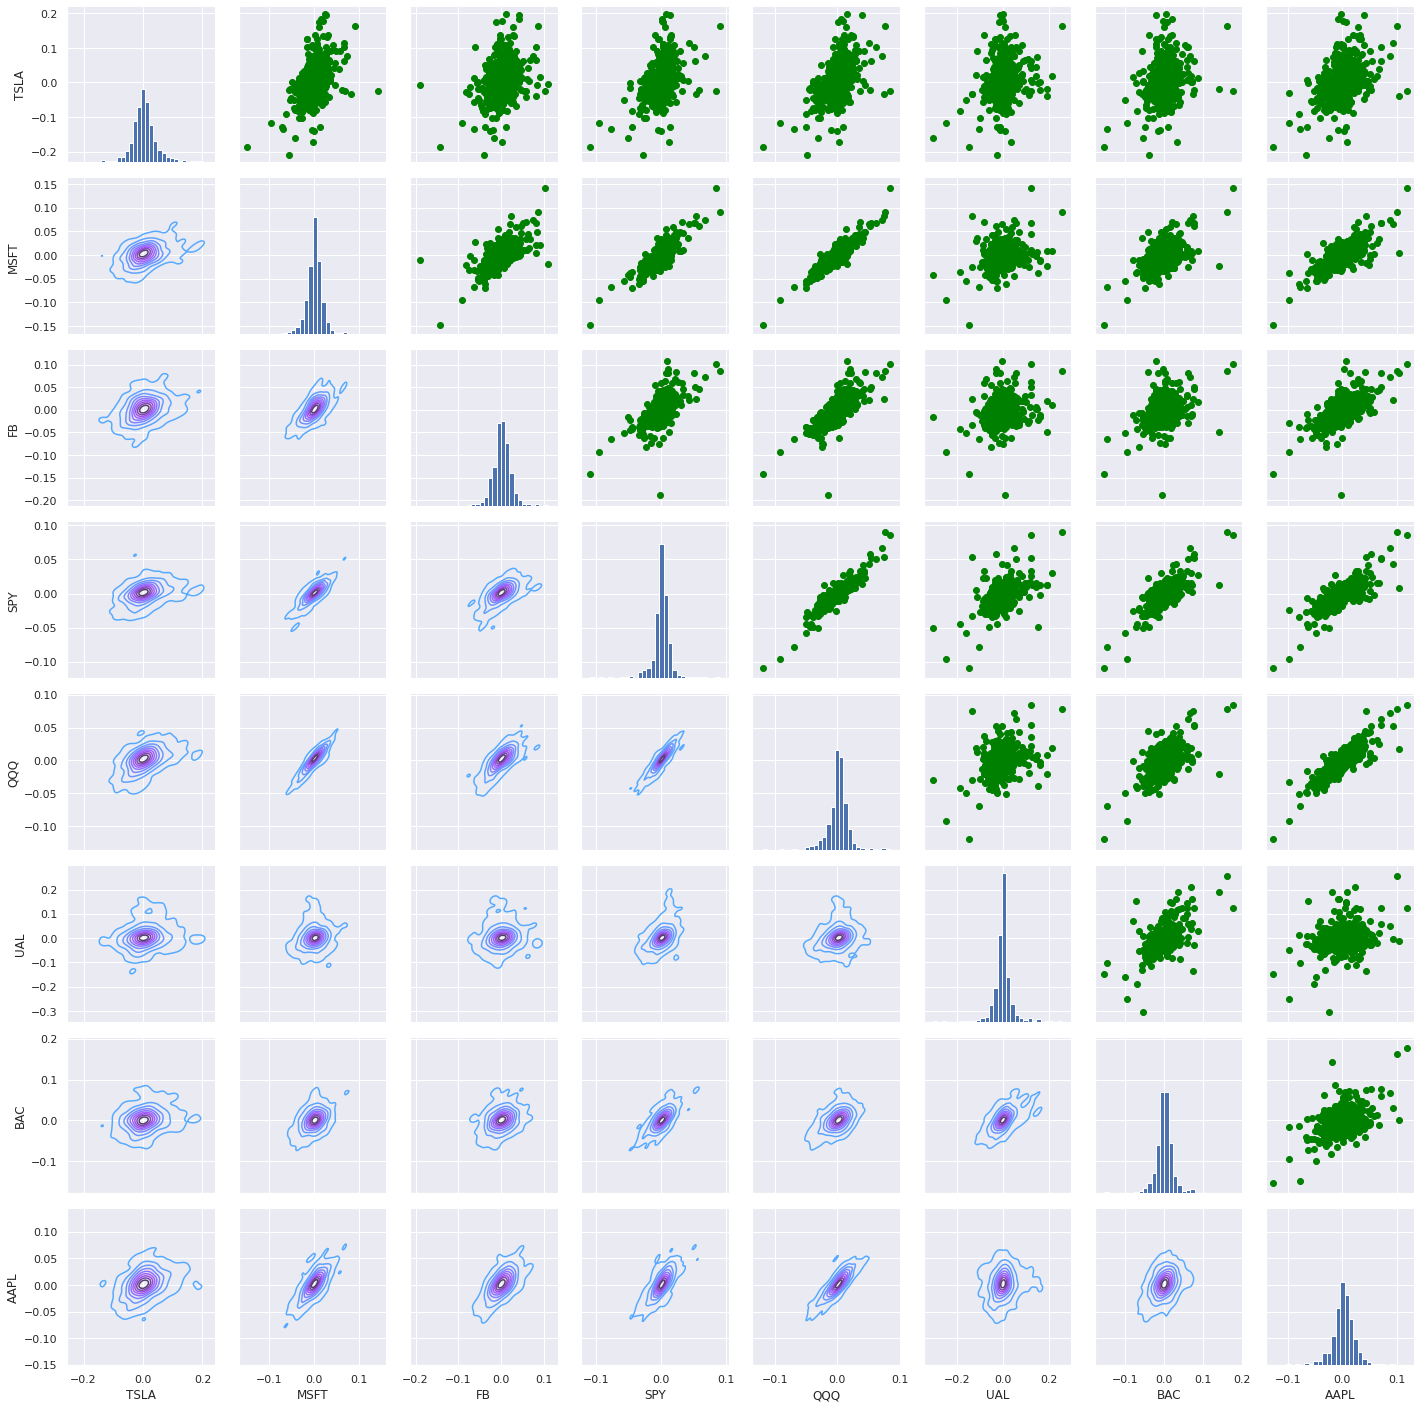

In [106]:
returns_fig = sns.PairGrid(tech_returns.dropna())

returns_fig.map_upper(plt.scatter,color='green')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

## 9. lmPlots

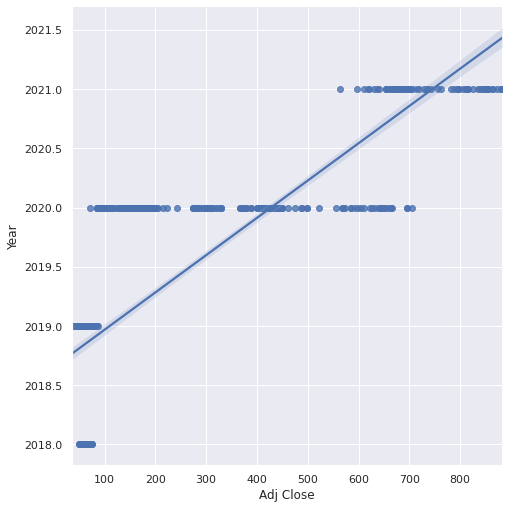

In [151]:
# Example 1 - Investigate to predict the Closing price in 2021

ax = sns.lmplot(data=TSLA,x="Adj Close", y="Year", height=7)

# Notes:
# What is Linear Regression: It is a predictive statistical method for modelling the relationship between 
#x (independent variable) & y (dependent V).
# How it works (cost function MSE): 
#https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

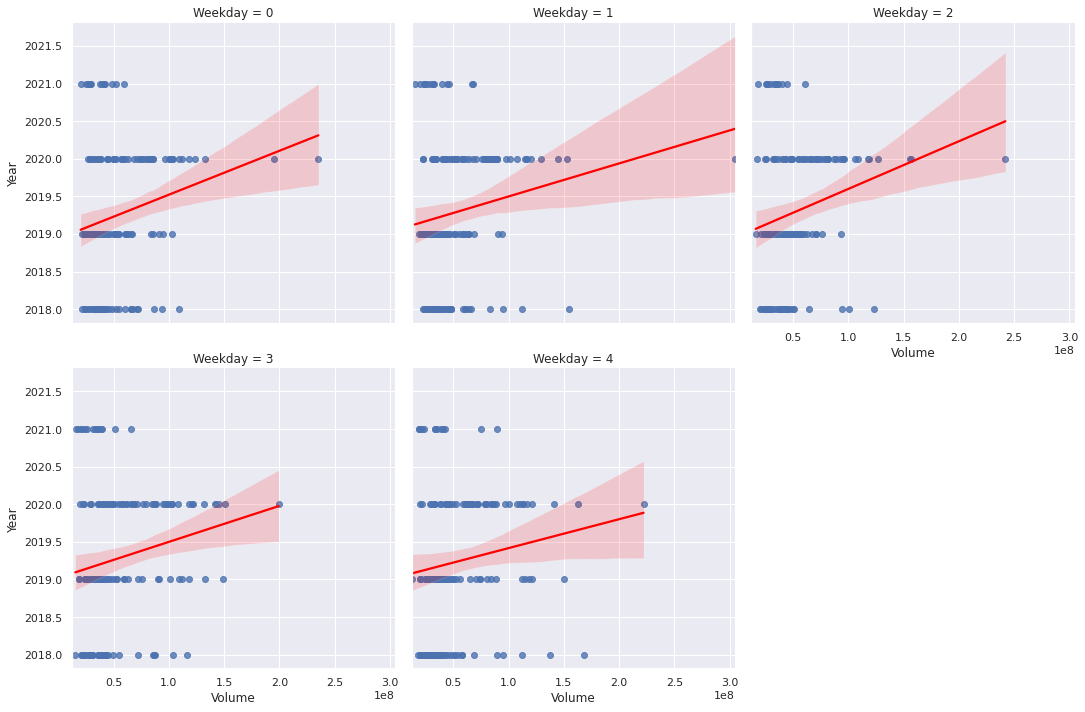

In [100]:
# Example 1 - Investigate to predict the Closing price in 2021- Change color and column wrap
ax = sns.lmplot(data=TSLA,x="Volume", y="Year", height=5, col="Weekday",line_kws= {'color':'red'},col_wrap=3)

# Notes:
# What is Linear Regression: It is a predictive statistical method for modelling the relationship between 
#x (independent variable) & y (dependent V).
# How it works (cost function MSE): 
#https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

## 10. Heat Map

First we need to create a "Dataset" to display on a Heatmap - we will use a correlation 
 dataset .corr() is used to find the pairwise correlation of all columns in the dataframe.
 Any null values are automatically excluded. The closer to 1 or -1 the better. 
 As one variable increases, the other variable tends to also increase / decrease

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

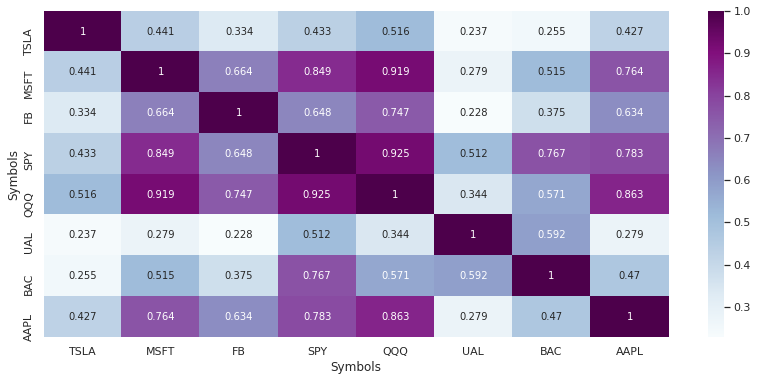

In [154]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='BuPu', annot_kws={'size':10})

#Here, we can easily interpret: SPY ETF (S&P 500 ETF) & QQQ (NASDAQ ETF) are highly correlated.
FB and UAL are not correlated at all.
It's easily inferenced that Microsoft,SPY, QQQ and Apple are strongly correlated. Also, all Tech companies are strongly correlated.

The above visualisation gives a first indication of which stocks daily returns for the year 2019 are correlated / inversely correlated. In an initial observation.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

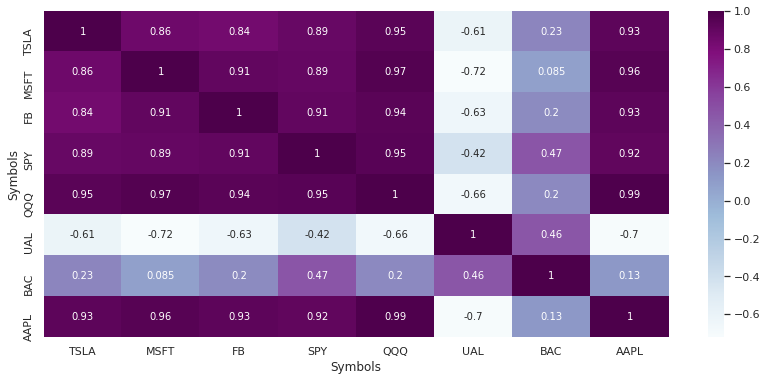

In [103]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily closing of the stocks.
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".2g",cmap='BuPu', annot_kws={'size':10})

In regards to closing price, there seems to be little correlation amongst the selected technology stocks; 
except for Google and Microsoft, their closing price seems to be correlated with Apple's closing price.

### More details for Heatmaps here:
https://seaborn.pydata.org/generated/seaborn.heatmap.html